<a href="https://colab.research.google.com/github/Ajita-Shri/Sparse-Optical-Flow/blob/master/mathdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
dataset = pd.read_csv('student-mat.csv')
X = dataset.iloc[:,0:32].values
y= dataset.iloc[:,32].values

In [5]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])
X[:, 1] = le.fit_transform(X[:, 1])
X[:, 3] = le.fit_transform(X[:, 3])
X[:, 4] = le.fit_transform(X[:, 4])
X[:, 5] = le.fit_transform(X[:, 5])
X[:, 8] = le.fit_transform(X[:, 8])
X[:, 9] = le.fit_transform(X[:, 9])
X[:, 10] = le.fit_transform(X[:, 10])
X[:, 11] = le.fit_transform(X[:, 11])
X[:, 15] = le.fit_transform(X[:, 15])
X[:, 16] = le.fit_transform(X[:, 16])
X[:, 17] = le.fit_transform(X[:, 17])
X[:, 18] = le.fit_transform(X[:, 18])
X[:, 19] = le.fit_transform(X[:, 19])
X[:, 20] = le.fit_transform(X[:, 20])
X[:, 21] = le.fit_transform(X[:, 21])
X[:, 22] = le.fit_transform(X[:, 22])

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [8,9,10,11])], remainder='passthrough')
X= np.array(ct.fit_transform(X), dtype= np.float)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

m : [-3.48101413e+09 -2.60006038e+09 -4.59946959e+09 -3.98806591e+09
 -3.30665331e+09 -2.49942855e+13 -2.21903336e+13 -5.37083500e+13
 -4.83398280e+13 -2.85688914e+13  6.09687311e+13  5.63003280e+13
  3.40212336e+13  5.60979126e+13 -2.39696946e+13 -2.62214713e+13
 -1.54111751e+13  9.90625872e-02  8.52886799e-02 -3.07437518e-01
  1.22602661e-02  8.39813686e-02 -4.85825501e-02  1.40235267e-01
 -1.12240439e-01 -8.95687845e-03 -4.96994772e-02 -1.14676621e-01
  1.30561253e-01  5.62871919e-03  1.66277882e-01 -1.03052734e-01
 -1.17331080e-01 -5.39709330e-02 -2.37720013e-02 -1.50398374e-01
  2.35504031e-01  1.17298365e-01  1.08680129e-01 -1.37586266e-01
  1.82874531e-01  1.44415975e-01  4.18253928e-01  7.93535948e-01
  3.47597170e+00]
c:  10.26494461575191
MAE: 1.2659063432761404
RMSE:  1.7857548383200543
Accuracy : 0.8315954318999532


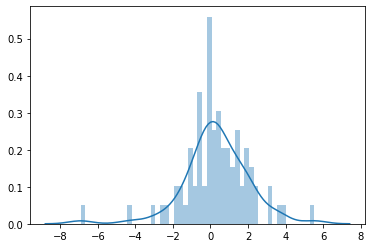

In [28]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train, y_train)
print('m :', lr.coef_)
print('c: ',lr.intercept_)
y_pred= lr.predict(X_test)


import seaborn as sns
sns.distplot(y_test-y_pred, bins=50)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
accuracy= lr.score(X_test,y_test)
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy :', accuracy)